In [26]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers

In [27]:
train_dir= r'C:\Users\HITECH\Downloads\cats_and_dogs_small\train'
test_dir = r'C:\Users\HITECH\Downloads\cats_and_dogs_small\test'
validation_dir = r'C:\Users\HITECH\Downloads\cats_and_dogs_small\validation'

In [28]:
from tensorflow.keras.preprocessing.image  import ImageDataGenerator

In [29]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator  = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = "binary"
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = "binary"
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [30]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [31]:
model = models.Sequential()
model.add(layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding='valid', activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(filters = 128, kernel_size = (3, 3), strides=1, padding='valid', activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(filters = 128, kernel_size = (3, 3), strides=1, padding='valid', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [32]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [44]:
import math

train_samples = train_generator.samples  # Total number of training samples
validation_samples = validation_generator.samples  # Total number of validation samples
batch_size = 20  #

In [45]:
steps_per_epoch = math.ceil(train_samples / batch_size)
validation_steps = math.ceil(validation_samples / batch_size)

In [46]:
model_history = model.fit(train_generator,steps_per_epoch=100,epochs=20,validation_data = validation_generator,validation_steps = 50)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 374ms/step - acc: 0.8370 - loss: 0.3763 - val_acc: 0.7180 - val_loss: 0.5837
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 202us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 353ms/step - acc: 0.8475 - loss: 0.3474 - val_acc: 0.7140 - val_loss: 0.5765
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 170us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 404ms/step - acc: 0.8757 - loss: 0.3224 - val_acc: 0.7050 - val_loss: 0.6015
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 452ms/step - acc: 0.8682 - loss: 0.3076 - val_acc: 0.7090 - val_loss: 0.5725
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 362ms/step - acc: 0.8928 - loss: 0.2739 - val_acc: 0.7180 - val_loss: 0.6029
Epoch 10/20
100/100 ━━━━━━━━━━━

In [ ]:
model.evaluate(train_generator)

In [11]:
import pandas as pd

In [13]:
for key, value in model_history.history.items():
    print(f"{key}: {len(value)}")


acc: 20
loss: 20
val_acc: 10
val_loss: 10


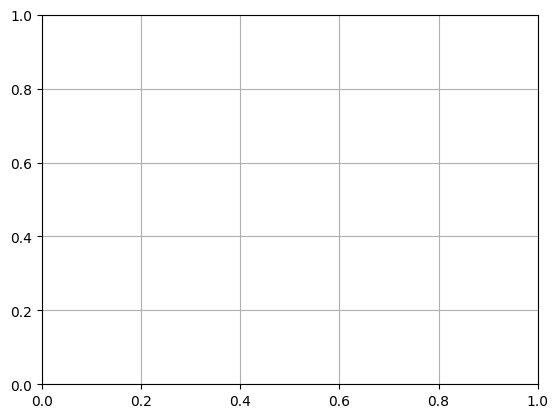

In [48]:
plt.grid(True)

In [54]:

pd.DataFrame(model_history.history).plot(figsize=(8, 5))


ValueError: All arrays must be of the same length

In [47]:
plt.show()

VGG16